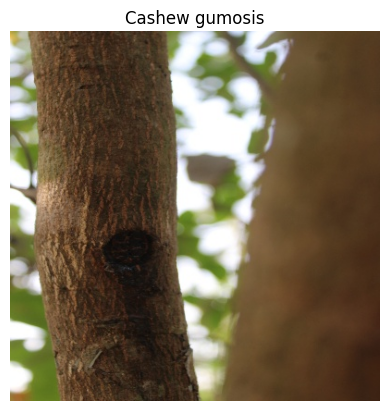

(400, 400, 3)
/home/wouter/code/MahautHDL/save_the_crops/raw_data/
['Cassava brown spot', 'Cassava mosaic', 'Cassava green mite', 'Tomato leaf blight', 'Cashew leaf miner', 'Cassava healthy', 'Cassava bacterial blight', 'Cashew gumosis', 'Maize leaf blight', 'Maize fall armyworm', 'Tomato leaf curl', 'Tomato verticulium wilt', 'Maize grasshoper', 'Maize streak virus', 'Cashew red rust', 'Tomato healthy', 'Cashew healthy', 'Maize leaf beetle', 'Cashew anthracnose', 'Tomato septoria leaf spot', 'Maize leaf spot', 'Maize healthy']


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ! unzip -n ~/code/MahautHDL/save_the_crops/raw_data/crop.zip -d ~/code/MahautHDL/save_the_crops/raw_data

data_link = os.environ.get("LOCAL_PATH")

crops = os.listdir(data_link)
plant_disease = np.random.randint(0, len(crops))
plant_disease_name = crops[plant_disease]

os.chdir(f'{data_link}{plant_disease_name}')

link = os.listdir(f"{data_link}{plant_disease_name}")
rand_pic_nr = np.random.randint(0, len(link))

img = plt.imread(link[rand_pic_nr])

plt.imshow(img)
plt.axis(False)
plt.title(plant_disease_name)
plt.show()
print(img.shape)
print(data_link)
print(crops)


In [21]:
import tensorflow as tf
import os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# from tensorflow import keras

def import_and_preprocess_pictures(directory=data_link):
    images = []
    labels = []

    crops = os.listdir(data_link)

    for i in range(0,len(crops)):
        plant_disease_name = crops[i]
        os.chdir(f'{data_link}{plant_disease_name}')

        filenames = os.listdir(f"{data_link}{plant_disease_name}")
        for index, filename in enumerate(filenames):
            if filename.endswith(".jpg"):
                # file_path = os.path.join(filenames)
                link = os.listdir(f"{data_link}{plant_disease_name}")

                try:
                    img = plt.imread(link[index])

                    # img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    # if img is not None:
                    #     img = cv2.resize(img, image_size)

                    #     # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    #     clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    #     img = clahe.apply(img)

                    images.append(filename)
                    labels.append(plant_disease_name)
                except ValueError:
                    pass  # Skip the image
            else:
                pass

    return images, labels

    # tf.keras.preprocessing.image_dataset_from_directory(
    #     # directory=os.environ.get("LOCAL_PATH"),
    #     directory=data_link,
    #     labels='inferred',
    #     image_size=(224,224),
    #     # class_names=
    #     label_mode="categorical",
    #     batch_size=32
    # )
images, labels = import_and_preprocess_pictures()

UnidentifiedImageError: cannot identify image file 'leaf blight998_.jpg'

In [25]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>

In [31]:
for images, labels in test.take(1):
  print(images, labels)

Corrupt JPEG data: 26519 extraneous bytes before marker 0xd9
JPEG datastream contains no image


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

Corrupt JPEG data: premature end of data segment
Unsupported marker type 0x99
